# 🔍 梯度下降 vs 最小二乘法：深度对比

## 🤔 核心问题

**为什么需要梯度下降？最小二乘法不是能直接算出 w 和 b 吗？**

这是一个非常好的问题！让我们深入对比这两种方法。

---


## 📊 快速对比表

| 特性 | 最小二乘法 | 梯度下降 |
|------|-----------|---------|
| **求解方式** | 解析解（公式直接算） | 迭代优化（一步步逼近） |
| **速度** | ⚡ 快（一步到位） | 🐢 慢（需要多次迭代） |
| **适用范围** | 📏 仅线性回归 | 🌐 几乎所有问题 |
| **计算复杂度** | O(n³) 矩阵求逆 | O(n) 每次迭代 |
| **大数据** | ❌ 数据量大时很慢 | ✅ 可以用小批量 |
| **神经网络** | ❌ 无法使用 | ✅ 唯一选择 |
| **非线性问题** | ❌ 无法处理 | ✅ 可以处理 |

---


## 💡 用比喻理解区别

### 🎯 问题：从北京到上海怎么走？

#### 方法1：最小二乘法（查地图）
```
你：我要从北京去上海
地图：直接告诉你最优路线
你：OK，直接按这个走
```
- ✅ **一步到位**，直接得到答案
- ❌ **只适用于简单问题**（路线已知）

#### 方法2：梯度下降（问路人）
```
你：我要去上海，现在该往哪走？
路人：往南走
你：（走100米）现在该往哪走？
路人：往东南走
你：（走100米）现在该往哪走？
... 重复多次，最终到达上海
```
- ❌ **需要多次询问**，逐步接近
- ✅ **适用于复杂问题**（没有地图时也能找到路）

---


In [ ]:
# 导入必要的库
import numpy as np
import matplotlib.pyplot as plt
import time

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

print("✅ 环境配置完成！")


✅ 环境配置完成！


## 💻 代码对比：两种方法求解线性回归

### 准备数据


📊 数据集：100 个样本
真实关系：y = 2x + 1 + 噪声


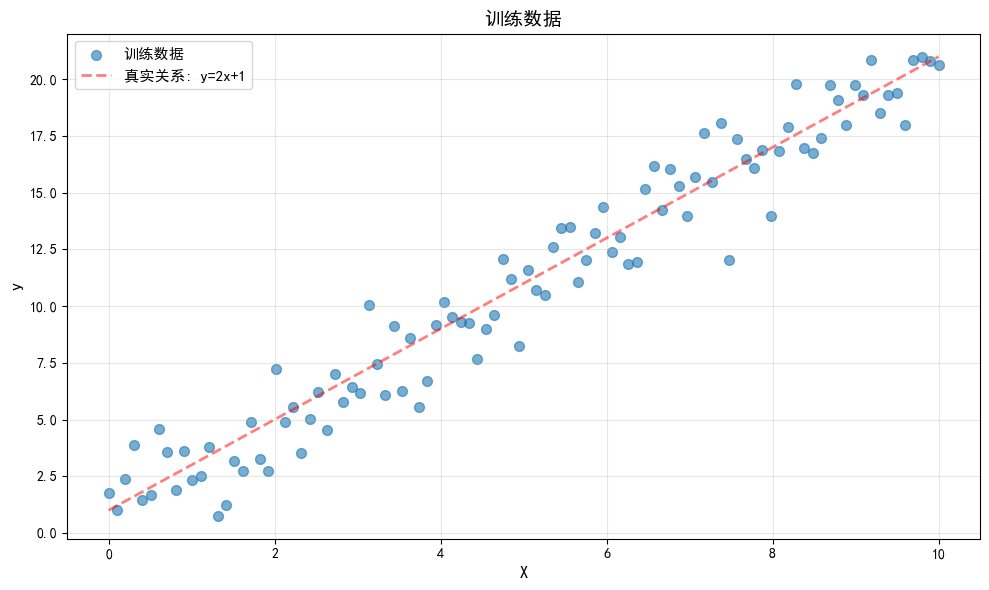

In [ ]:
# 生成训练数据
np.random.seed(42)
n_samples = 100
X = np.linspace(0, 10, n_samples)
y = 2 * X + 1 + np.random.randn(n_samples) * 1.5  # y = 2x + 1 + 噪声

print(f"📊 数据集：{n_samples} 个样本")
print(f"真实关系：y = 2x + 1 + 噪声")

# 可视化数据
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, s=50, label='训练数据')
plt.plot(X, 2*X + 1, 'r--', linewidth=2, alpha=0.5, label='真实关系: y=2x+1')
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('训练数据', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 方法1️⃣：最小二乘法（解析解）

### 数学原理

对于线性回归 y = wx + b，最小二乘法有**直接公式**：

#### 矩阵形式：
```
Y = Xθ + 噪声

其中：
- Y 是目标值向量
- X 是特征矩阵（增加一列全1，用于截距b）
- θ = [b, w]ᵀ 是参数向量

最优解（闭式解）：
θ = (XᵀX)⁻¹Xᵀy
```

这就是您学过的**最小二乘法的矩阵形式**！

### 代码实现


In [ ]:
def least_squares(X, y):
    """
    最小二乘法：使用解析解直接计算
    
    公式：θ = (XᵀX)⁻¹Xᵀy
    """
    # 构造设计矩阵（添加截距列）
    X_design = np.column_stack([np.ones(len(X)), X])
    
    # 直接计算最优解：θ = (XᵀX)⁻¹Xᵀy
    theta = np.linalg.inv(X_design.T @ X_design) @ X_design.T @ y
    
    b = theta[0]  # 截距
    w = theta[1]  # 斜率
    
    return w, b

# ===== 运行最小二乘法 =====
print("="*60)
print("🎯 方法1：最小二乘法（解析解）")
print("="*60)

start_time = time.time()
w_ls, b_ls = least_squares(X, y)
time_ls = time.time() - start_time

print(f"\n✅ 计算完成！")
print(f"⏱️  耗时：{time_ls*1000:.4f} 毫秒")
print(f"📊 结果：w = {w_ls:.4f}, b = {b_ls:.4f}")
print(f"📌 真实：w = 2.0000, b = 1.0000")
print(f"📏 误差：Δw = {abs(w_ls-2):.4f}, Δb = {abs(b_ls-1):.4f}")
print("="*60)


🎯 方法1：最小二乘法（解析解）

✅ 计算完成！
⏱️  耗时：0.1388 毫秒
📊 结果：w = 2.0207, b = 0.7408
📌 真实：w = 2.0000, b = 1.0000
📏 误差：Δw = 0.0207, Δb = 0.2592


## 方法2️⃣：梯度下降（迭代优化）

### 数学原理

梯度下降**没有直接公式**，而是通过**迭代更新**：

```
初始化：w = 0, b = 0

重复以下步骤：
  1. 计算预测值：y_pred = wx + b
  2. 计算梯度：
     ∂L/∂w = -2 × mean(X × (y - y_pred))
     ∂L/∂b = -2 × mean(y - y_pred)
  3. 更新参数：
     w = w - α × ∂L/∂w
     b = b - α × ∂L/∂b
     
直到收敛（损失不再下降）
```

### 代码实现


In [ ]:
def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    """
    梯度下降：迭代优化
    """
    w = 0.0
    b = 0.0
    n = len(X)
    
    loss_history = []
    
    for i in range(iterations):
        # 1. 计算预测值
        y_pred = w * X + b
        
        # 2. 计算损失
        loss = np.mean((y - y_pred) ** 2)
        loss_history.append(loss)
        
        # 3. 计算梯度
        dw = -2 * np.mean(X * (y - y_pred))
        db = -2 * np.mean(y - y_pred)
        
        # 4. 更新参数
        w = w - learning_rate * dw
        b = b - learning_rate * db
    
    return w, b, loss_history

# ===== 运行梯度下降 =====
print("="*60)
print("🎯 方法2：梯度下降（迭代优化）")
print("="*60)

start_time = time.time()
w_gd, b_gd, losses = gradient_descent(X, y, learning_rate=0.01, iterations=1000)
time_gd = time.time() - start_time

print(f"\n✅ 训练完成！")
print(f"⏱️  耗时：{time_gd*1000:.4f} 毫秒")
print(f"📊 结果：w = {w_gd:.4f}, b = {b_gd:.4f}")
print(f"📌 真实：w = 2.0000, b = 1.0000")
print(f"📏 误差：Δw = {abs(w_gd-2):.4f}, Δb = {abs(b_gd-1):.4f}")
print(f"🔄 迭代次数：1000 次")
print("="*60)


🎯 方法2：梯度下降（迭代优化）

✅ 训练完成！
⏱️  耗时：7.5202 毫秒
📊 结果：w = 2.0211, b = 0.7378
📌 真实：w = 2.0000, b = 1.0000
📏 误差：Δw = 0.0211, Δb = 0.2622
🔄 迭代次数：1000 次


## 📊 可视化对比结果


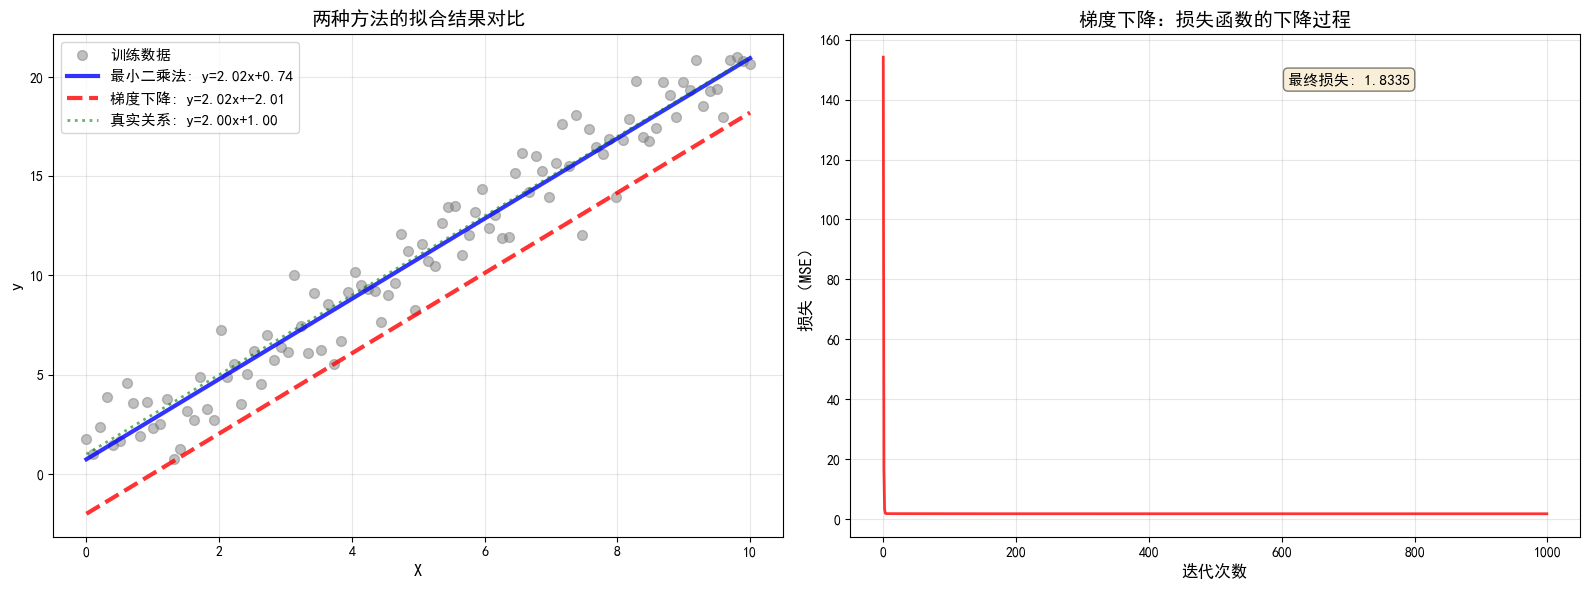


💡 观察：
  - 左图：两种方法得到的直线几乎完全重合！
  - 右图：梯度下降需要多次迭代才能接近最优解

⏱️  速度对比：
  - 最小二乘法：0.1388 毫秒（快 54.2 倍）
  - 梯度下降：7.5202 毫秒


In [ ]:
# 对比两种方法的结果
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 左图：拟合结果对比
ax1.scatter(X, y, alpha=0.5, s=50, label='训练数据', color='gray')
ax1.plot(X, w_ls * X + b_ls, 'b-', linewidth=3, 
         label=f'最小二乘法: y={w_ls:.2f}x+{b_ls:.2f}', alpha=0.8)
ax1.plot(X, w_gd * X + b_gd, 'r--', linewidth=3, 
         label=f'梯度下降: y={w_gd:.2f}x+{b_gd:.2f}', alpha=0.8)
ax1.plot(X, 2*X + 1, 'g:', linewidth=2, 
         label='真实关系: y=2.00x+1.00', alpha=0.6)
ax1.set_xlabel('X', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.set_title('两种方法的拟合结果对比', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# 右图：梯度下降的损失下降过程
ax2.plot(losses, 'r-', linewidth=2, alpha=0.8)
ax2.set_xlabel('迭代次数', fontsize=12)
ax2.set_ylabel('损失（MSE）', fontsize=12)
ax2.set_title('梯度下降：损失函数的下降过程', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.text(0.6, 0.9, f'最终损失: {losses[-1]:.4f}', 
         transform=ax2.transAxes, fontsize=11,
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("\n💡 观察：")
print("  - 左图：两种方法得到的直线几乎完全重合！")
print("  - 右图：梯度下降需要多次迭代才能接近最优解")
print(f"\n⏱️  速度对比：")
print(f"  - 最小二乘法：{time_ls*1000:.4f} 毫秒（快 {time_gd/time_ls:.1f} 倍）")
print(f"  - 梯度下降：{time_gd*1000:.4f} 毫秒")


## 🤔 既然结果一样，为什么还需要梯度下降？

### 关键答案：**梯度下降的真正价值在于它的通用性！**

---

### 📌 场景1：简单线性回归（本例）

```python
问题：y = wx + b
```

| 方法 | 结果 |
|------|------|
| 最小二乘法 | ✅ **推荐**：快速、精确 |
| 梯度下降 | ⚠️ 可用，但没必要（杀鸡用牛刀） |

**结论：** 对于简单线性回归，**用最小二乘法！**

---

### 📌 场景2：神经网络（复杂问题）

```python
问题：多层神经网络，有几百万个参数
输入 → 隐藏层1 → 隐藏层2 → ... → 输出
```

| 方法 | 结果 |
|------|------|
| 最小二乘法 | ❌ **无法使用**：没有公式可算 |
| 梯度下降 | ✅ **唯一选择**：可以处理任意复杂的模型 |

**结论：** 对于神经网络，**只能用梯度下降！**

---


## 🔍 深入理解：为什么神经网络不能用最小二乘法？

### 原因1：没有解析解

**最小二乘法需要：**
- ✅ 问题是**线性的**
- ✅ 有明确的**数学公式**可以求导并令导数为0
- ✅ 可以**解方程组**得到精确解

**神经网络的问题：**
- ❌ 有**非线性激活函数**（ReLU, Sigmoid, Tanh...）
- ❌ 有**多层结构**，关系复杂
- ❌ **无法写出解析解**的公式

### 原因2：参数数量巨大

**最小二乘法需要计算：**
```python
θ = (XᵀX)⁻¹Xᵀy
```

这需要求矩阵的逆，计算复杂度是 **O(n³)**

**神经网络的情况：**
- GPT-3 有 **1750亿** 个参数
- 如果用最小二乘法，矩阵大小是 `1750亿 × 1750亿`
- **计算机的内存都装不下**，更别说计算了！

### 原因3：大数据场景

**最小二乘法：**
- 必须一次性处理**所有数据**
- 数据量大时非常慢

**梯度下降：**
- 可以用 **Mini-batch**，每次只用一小批数据
- 适合大数据场景

---


## 💻 实例：非线性问题（最小二乘法失效）

让我们看一个**非线性**的例子，证明最小二乘法的局限性。

### 问题：拟合一个抛物线

真实关系：`y = 0.5x² - 2x + 3`


C:\Users\Administrator\AppData\Local\Temp\ipykernel_25436\114870860.py:16: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from font(s) SimHei.
  plt.tight_layout()
C:\Users\Administrator\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


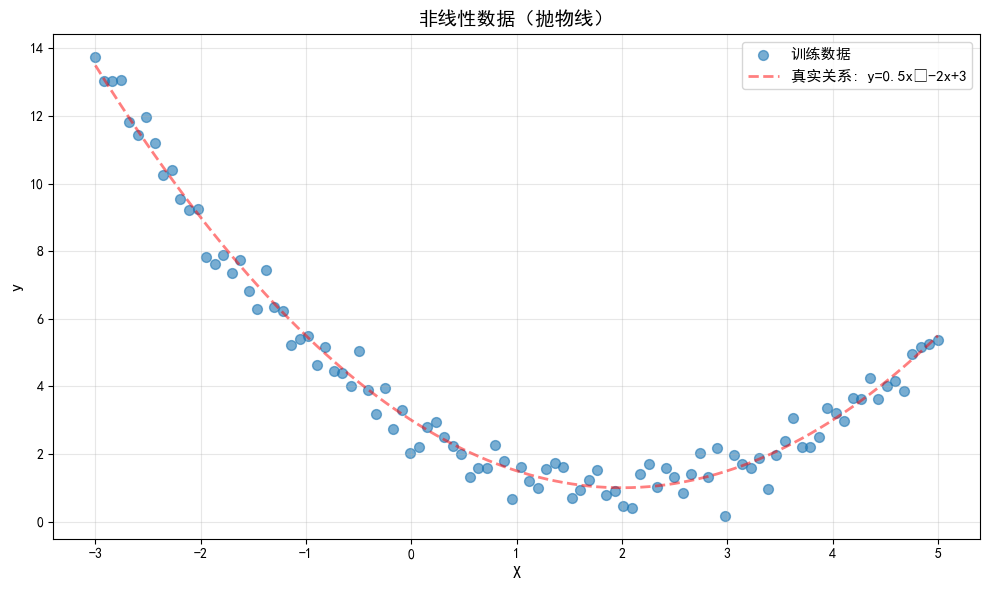

📊 非线性数据：y = 0.5x² - 2x + 3 + 噪声


In [ ]:
# 生成非线性数据
np.random.seed(42)
X_nonlinear = np.linspace(-3, 5, 100)
y_nonlinear = 0.5 * X_nonlinear**2 - 2 * X_nonlinear + 3 + np.random.randn(100) * 0.5

# 可视化数据
plt.figure(figsize=(10, 6))
plt.scatter(X_nonlinear, y_nonlinear, alpha=0.6, s=50, label='训练数据')
plt.plot(X_nonlinear, 0.5*X_nonlinear**2 - 2*X_nonlinear + 3, 'r--', 
         linewidth=2, alpha=0.5, label='真实关系: y=0.5x²-2x+3')
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('非线性数据（抛物线）', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("📊 非线性数据：y = 0.5x² - 2x + 3 + 噪声")


### 尝试1：用最小二乘法拟合（会失败）


In [ ]:
# 最小二乘法：只能拟合直线
w_ls_nl, b_ls_nl = least_squares(X_nonlinear, y_nonlinear)
y_pred_ls = w_ls_nl * X_nonlinear + b_ls_nl

# 计算误差
mse_ls = np.mean((y_nonlinear - y_pred_ls) ** 2)

print("="*60)
print("❌ 最小二乘法：强行拟合直线")
print("="*60)
print(f"结果：y = {w_ls_nl:.2f}x + {b_ls_nl:.2f}")
print(f"误差（MSE）：{mse_ls:.4f}")
print("问题：直线无法拟合抛物线！")
print("="*60)


❌ 最小二乘法：强行拟合直线
结果：y = -0.99x + 5.16
误差（MSE）：6.2586
问题：直线无法拟合抛物线！


### 尝试2：用梯度下降拟合（添加多项式特征）


In [ ]:
def gradient_descent_polynomial(X, y, learning_rate=0.001, iterations=5000):
    """
    梯度下降：拟合多项式 y = ax² + bx + c
    """
    a, b, c = 0.0, 0.0, 0.0
    n = len(X)
    
    loss_history = []
    
    for i in range(iterations):
        # 预测：y = ax² + bx + c
        y_pred = a * X**2 + b * X + c
        
        # 损失
        loss = np.mean((y - y_pred) ** 2)
        loss_history.append(loss)
        
        # 梯度
        da = -2 * np.mean((X**2) * (y - y_pred))
        db = -2 * np.mean(X * (y - y_pred))
        dc = -2 * np.mean(y - y_pred)
        
        # 更新
        a = a - learning_rate * da
        b = b - learning_rate * db
        c = c - learning_rate * dc
    
    return a, b, c, loss_history

# 运行梯度下降
print("="*60)
print("✅ 梯度下降：拟合抛物线")
print("="*60)

a_gd, b_gd, c_gd, losses_nl = gradient_descent_polynomial(
    X_nonlinear, y_nonlinear, learning_rate=0.001, iterations=5000
)

y_pred_gd = a_gd * X_nonlinear**2 + b_gd * X_nonlinear + c_gd
mse_gd = np.mean((y_nonlinear - y_pred_gd) ** 2)

print(f"结果：y = {a_gd:.2f}x² + {b_gd:.2f}x + {c_gd:.2f}")
print(f"真实：y = 0.50x² - 2.00x + 3.00")
print(f"误差（MSE）：{mse_gd:.4f}")
print("✅ 成功拟合抛物线！")
print("="*60)


✅ 梯度下降：拟合抛物线
结果：y = 0.51x² + -2.01x + 2.89
真实：y = 0.50x² - 2.00x + 3.00
误差（MSE）：0.2031
✅ 成功拟合抛物线！


### 可视化对比：非线性问题


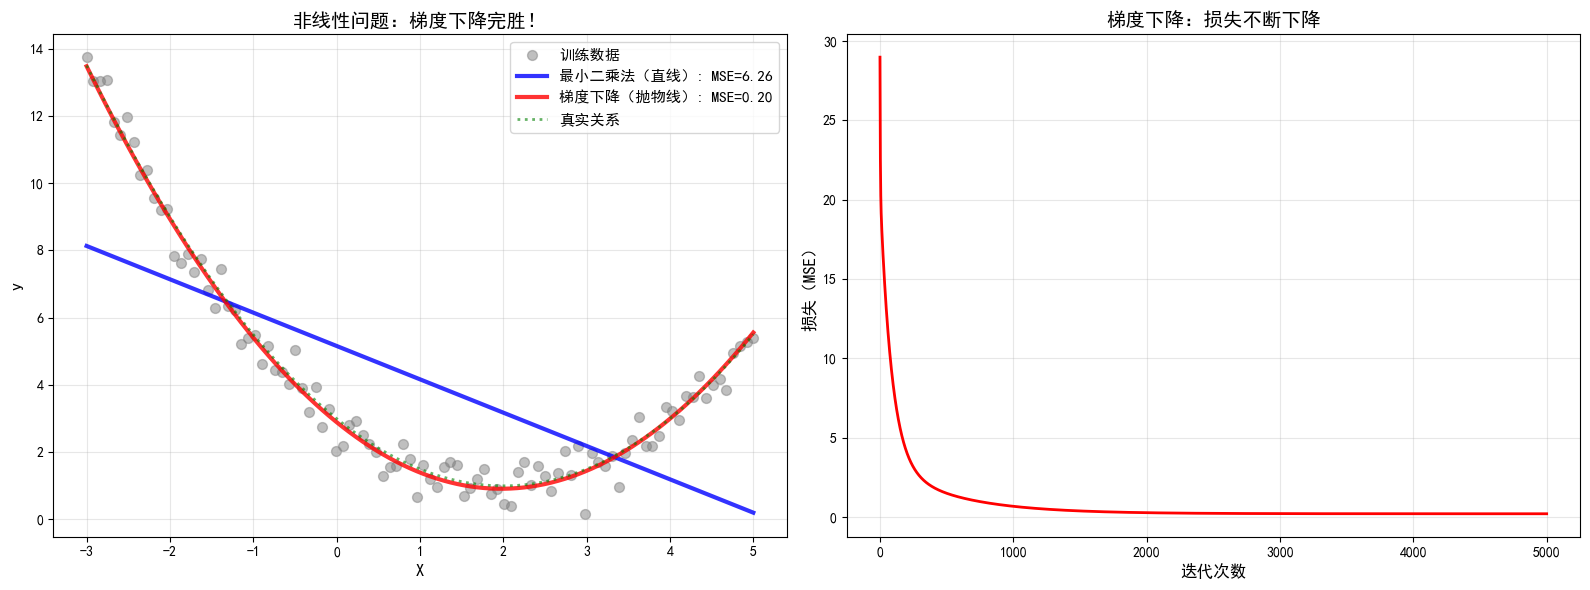


💡 结论：
  - 最小二乘法（直线）：MSE = 6.2586 ❌ 拟合很差
  - 梯度下降（抛物线）：MSE = 0.2031 ✅ 拟合很好
  - 梯度下降的误差降低了 30.8 倍！


In [ ]:
# 对比非线性拟合结果
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 左图：拟合结果对比
ax1.scatter(X_nonlinear, y_nonlinear, alpha=0.5, s=50, label='训练数据', color='gray')
ax1.plot(X_nonlinear, y_pred_ls, 'b-', linewidth=3, 
         label=f'最小二乘法（直线）: MSE={mse_ls:.2f}', alpha=0.8)
ax1.plot(X_nonlinear, y_pred_gd, 'r-', linewidth=3, 
         label=f'梯度下降（抛物线）: MSE={mse_gd:.2f}', alpha=0.8)
ax1.plot(X_nonlinear, 0.5*X_nonlinear**2 - 2*X_nonlinear + 3, 'g:', 
         linewidth=2, label='真实关系', alpha=0.6)
ax1.set_xlabel('X', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.set_title('非线性问题：梯度下降完胜！', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# 右图：梯度下降的损失下降
ax2.plot(losses_nl, 'r-', linewidth=2)
ax2.set_xlabel('迭代次数', fontsize=12)
ax2.set_ylabel('损失（MSE）', fontsize=12)
ax2.set_title('梯度下降：损失不断下降', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n💡 结论：")
print(f"  - 最小二乘法（直线）：MSE = {mse_ls:.4f} ❌ 拟合很差")
print(f"  - 梯度下降（抛物线）：MSE = {mse_gd:.4f} ✅ 拟合很好")
print(f"  - 梯度下降的误差降低了 {mse_ls/mse_gd:.1f} 倍！")


## 🎯 总结：什么时候用哪种方法？

### ✅ 使用最小二乘法的场景

| 场景 | 原因 |
|------|------|
| **简单线性回归** | 快速、精确、一步到位 |
| **数据量不大** | < 10000 个样本 |
| **追求精确解** | 需要数学上的最优解 |
| **模型简单** | 只有少量参数 |

**示例：**
- 房价预测（简单线性模型）
- 简单的统计分析
- 小规模数据集

---

### ✅ 使用梯度下降的场景

| 场景 | 原因 |
|------|------|
| **神经网络/深度学习** | 唯一可行的方法 |
| **非线性问题** | 可以处理复杂模型 |
| **大数据** | 可以用 Mini-batch |
| **在线学习** | 可以动态更新模型 |
| **参数巨多** | 不需要矩阵求逆 |

**示例：**
- **Word2Vec**（词向量训练）
- **BERT, GPT**（大语言模型）
- **图像识别**（CNN）
- **语音识别**（RNN）
- **推荐系统**（深度神经网络）

---


## 🌟 关键理解：梯度下降的意义

### 1️⃣ **通用性**

```
最小二乘法：只能解决特定问题（线性回归）
梯度下降：可以解决几乎所有优化问题
```

**比喻：**
- 最小二乘法 = 专用工具（螺丝刀）
- 梯度下降 = 万能工具（瑞士军刀）

### 2️⃣ **深度学习的基础**

```python
# 所有深度学习框架都基于梯度下降
import torch
optimizer = torch.optim.Adam(model.parameters())  # 梯度下降的变体

import tensorflow as tf
optimizer = tf.keras.optimizers.Adam()  # 梯度下降的变体
```

**关键点：**
- 没有梯度下降，就没有现代深度学习
- ChatGPT、GPT-4 都是用梯度下降训练的
- 您学习的 RAG 系统，底层的 embedding 模型也是梯度下降训练的

### 3️⃣ **连接简单和复杂**

```
简单：线性回归（2个参数）
      ↓ 梯度下降适用
中等：多项式回归（10个参数）
      ↓ 梯度下降适用
复杂：神经网络（1000个参数）
      ↓ 梯度下降适用
超复杂：GPT-3（1750亿个参数）
      ↓ 梯度下降适用
```

**梯度下降提供了一个统一的框架！**

---


## 📚 学习路径建议

### 🎓 您现在的位置

```
✅ 已掌握：
  - 最小二乘法（线性回归的解析解）
  - 矩阵运算
  - 梯度下降的基本原理

📍 当前疑问：
  - 为什么需要梯度下降？（本文档已解答）
```

### 🚀 建议的学习路径

```
第1步：理解梯度下降的意义 ✅（本文档）
   ↓
第2步：学习反向传播（Backpropagation）
   - 神经网络如何计算梯度
   - 链式法则的应用
   ↓
第3步：了解优化器（Optimizers）
   - SGD, Adam, RMSprop
   - 为什么比基础梯度下降更好
   ↓
第4步：实战：训练一个简单的神经网络
   - 手写数字识别（MNIST）
   - 体验梯度下降的实际应用
   ↓
第5步：深入：词向量训练
   - Word2Vec 如何用梯度下降训练
   - 为 RAG 系统做准备
```

---


## 💡 最后的比喻

### 🔧 修东西的两种方法

#### 场景：修一个简单的坏灯泡

**方法1：查说明书（最小二乘法）**
```
1. 翻开说明书
2. 找到故障代码
3. 按照步骤操作
4. ✅ 直接修好

优点：快速、精确
缺点：只能修说明书里写的问题
```

**方法2：试错法（梯度下降）**
```
1. 试试拧一下
2. 没好？再试试换个零件
3. 还没好？再试试...
4. ✅ 最终修好

优点：什么问题都能尝试解决
缺点：慢，需要多次尝试
```

### 🚗 修一辆未来的外星飞船

**方法1：查说明书（最小二乘法）**
```
❌ 没有说明书！无法使用！
```

**方法2：试错法（梯度下降）**
```
✅ 虽然慢，但可以一点点摸索
   最终找到修复方法！
```

---

### 🎯 结论

- **简单问题**（灯泡/线性回归）：用最小二乘法
- **复杂问题**（外星飞船/神经网络）：只能用梯度下降

**梯度下降的意义：**
让我们能够解决那些**没有说明书**（没有解析解）的复杂问题！

---

## ✅ 希望这个文档解答了您的疑惑！

如果还有问题，欢迎继续提问！😊
